### <i>P1: Complex potential for doublet</i>

Consider a doublet of strength $\kappa$ located at $(0,0)$. The velocity potential and streamfunction can be given as:

$$ \phi (r,\theta) = \frac{\kappa}{2 \pi} \frac{\cos \theta}{r}$$

$$ \psi (r,\theta) = -\frac{\kappa}{2 \pi} \frac{\sin \theta}{r}$$

The complex velocity potential is given as:

$$W = \phi + i \psi$$

$$ \Rightarrow W(r,\theta) = \frac{\kappa}{2\pi r} \left( \cos \theta - i \sin \theta \right)$$

$$ \Rightarrow W(r,\theta) = \frac{\kappa}{2\pi r} e^{-i \theta} $$

$$ \Rightarrow W(r,\theta) = \frac{\kappa}{2\pi \left( r e^{i \theta} \right)}  $$

$$ \Rightarrow W(z) = \frac{\kappa}{2\pi z}  $$

<hr>

### <i>P2 (a): Division of flow for integral $n$ in $W(z) = Az^{n}$</i>

Consider a potential flow, the complex potential for which is given by: 
$$ W(z) = Az^{n} $$

In polar coordinates $\left( r,\theta \right)$, the complex potential can be decomposed as:

$$ W(r,\theta) = A r^{n} \left( \cos (n\theta) + i\sin (n\theta) \right)$$

The streamfunction is the imaginary component of $W$ and can be expressed as:

$$ \psi(r,\theta) = A r^{n} \sin (n\theta)$$

To find the dividing streamlines, consider $\psi = 0$.
This leads to the condition, $n\theta = \pm m\pi$. For simplicity, consider $m = 1$. Thus, dividing streamlines are found where $\theta = \pm \frac{pi}{n}$. For $\theta \in [-\pi, \pi]$, a dividing streamline is found at every $\theta = \frac{pi}{n}$. Thus, the domain is divided into $2n$ parts.

<hr>

### <i>P2 (b): Contour plots for $n = 2, 3, 4, 5$ in $W(z) = Az^{n}$</i>

In [17]:
import numpy
import math
import cmath
from matplotlib import pyplot
%matplotlib inline

In [18]:
#Define grid parameters

N = 100
Xmin = -2.0; Xmax = 2.0
Ymin = -2.0; Ymax = 2.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

dx = x[1]-x[0]; dy = y[1]-y[0];

X, Y = numpy.meshgrid(x, y)

Z = X + 1j*Y

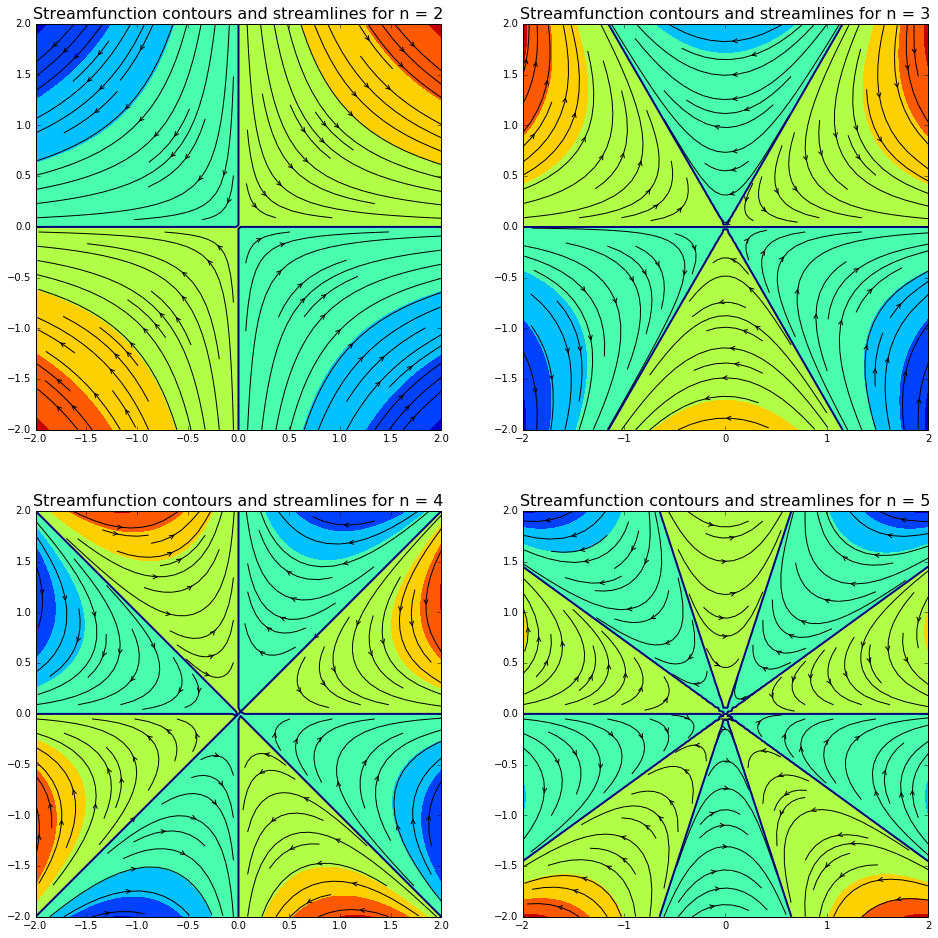

In [19]:
n = 2; A = 1.0

rad = numpy.zeros_like(X); theta = numpy.zeros_like(X)
fig, ax = pyplot.subplots(nrows=2, ncols=2)
fig.set_figheight(16); fig.set_figwidth(16)

irow1 = 0; irow2 = 0

for i_n in range(4):
    string = 'Streamfunction contours and streamlines for n = '
    string +=str(n)
    irow2 = i_n
    
    W = A*Z**n
    wvelo = A*n*Z**(n-1)
    
    rad = numpy.sqrt(X**2+Y**2);
    for i in range (N):
        for j in range(N):
            theta[j,i] = math.atan2(Y[j,i],X[j,i])
            
    if (i_n >=2 ):
        irow1 = 1
        irow2 = irow2-2
    psi = A*(rad**n)*numpy.sin(n*theta)
    
    n = n + 1
    
    ax[irow1,irow2].contourf(X,Y,psi)
    ax[irow1,irow2].contour(X,Y,psi,levels=[0.], linewidths=2, linestyles='solid')
    ax[irow1,irow2].streamplot(X,Y,wvelo.real,-wvelo.imag, linewidth=1, color ='#000000',\
                               arrowsize=1, arrowstyle='->')
    ax[irow1,irow2].set_title(string, fontsize = 16)

<hr>

### <i>P3 (a): Plots for complex potential for vortex near an infinte wall</i>

Consider an ideal vortex of strength $\Gamma$ located at $(a,0)$ from an infinite wall at $x = 0$. The flow can be emulated by superposing an equal but opposing vortex at distance $-a$ from the location of the wall.

The complex potential for the vortex at (a,0) can be expressed as: 

$$ F_{1}(z) = i \frac{\Gamma}{2 \pi} \ln (z-a)$$

Likewise, the complex potential for the vortex at (-a,0) can be expressed as:

$$ F_{2}(z) = -i \frac{\Gamma}{2 \pi} \ln (z+a)$$

Superimposing the two, the resulting complex potential is given as:

$$ F(z) = F_{1} + F_{2} $$

$$ \Rightarrow F(z) = i \frac{\Gamma}{2 \pi} \ln \left( \frac{z-a}{z+a} \right) $$

<hr>

### <i>P3 (b): Expression for $ \frac{p-p_{\infty}}{\rho}$ for vortex near an infinte wall</i>

Along a vertical wall, using no-penetration condition, $u = 0$. Also, the y-component of the velocity is given by:

$$ v(x,y) = -\frac{\Gamma}{2 \pi} \frac{(x-a)}{(x-a)^2+y^2}$$

At the wall $(x=0)$, 

$$ v_{wall} = v(0,y) = \frac{\Gamma}{\pi} \frac{a}{a^2+y^2}$$

To calculate pressure at a point along the wall, we can use the Bernoulli's equation with a point at $\infty$ as reference. At the reference point, there is no net velocity.

$$ \frac{p_{wall}}{\rho} + \frac{v_{wall}^{2}}{2} = \frac{p_{\infty}}{\rho} $$

$$ \Rightarrow \frac{p_{wall} - p_{\infty}}{\rho} = -\frac{v_{wall}^{2}}{2} $$

$$ \Rightarrow \frac{p_{wall} - p_{\infty}}{\rho} = - \frac{\Gamma^2}{2 \pi^2} \left( \frac{a}{a^2+y^2} \right) ^2 $$

<hr>

### <i>P3 (c): Plots for $ \frac{p-p_{\infty}}{\rho}$ for vortex near an infinte wall</i>

In [20]:
def add_vortex(Xp, Yp, xc, yc, strength, xvel, yvel, psivor):
    for i in range (N):
        for j in range (N):
            if (Xp[j,i]-xc != 0.0 and Yp[j,i]-yc != 0.0):
                xvel[j,i] =   strength/2.0/numpy.pi*(Yp[j,i]-yc)/((Xp[j,i]-xc)**2+(Yp[j,i]-yc)**2)
                yvel[j,i] =  -strength/2.0/numpy.pi*(Xp[j,i]-xc)/((Xp[j,i]-xc)**2+(Yp[j,i]-yc)**2)
                psivor[j,i] = strength/4.0/numpy.pi*numpy.log((Xp[j,i]-xc)**2+(Yp[j,i]-yc)**2)

In [21]:
#Define grid parameters

N = 100
Xmin = -4.0; Xmax = 4.0
Ymin = -4.0; Ymax = 4.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

dx = x[1]-x[0]; dy = y[1]-y[0];

X, Y = numpy.meshgrid(x, y)

Z = X + 1j*Y

#Define vortex parameters
xv = 1.0; yv = 0.0; gamma = 2.0; 
uv1 = numpy.zeros_like(X); vv1 = numpy.zeros_like(X); psiv1 = numpy.zeros_like(X)
uv2 = numpy.zeros_like(X); vv2 = numpy.zeros_like(X); psiv2 = numpy.zeros_like(X)

add_vortex(X, Y, xv, yv, gamma, uv1, vv1, psiv1)
add_vortex(X, Y, -1.0*xv, yv, -1.0*gamma, uv2, vv2, psiv2)

xvel = uv1 + uv2; yvel = vv1 + vv2
psi = psiv1 + psiv2

velo = numpy.sqrt(xvel**2+yvel**2)
vanalytic = gamma/math.pi*xv/(y**2 + xv**2)

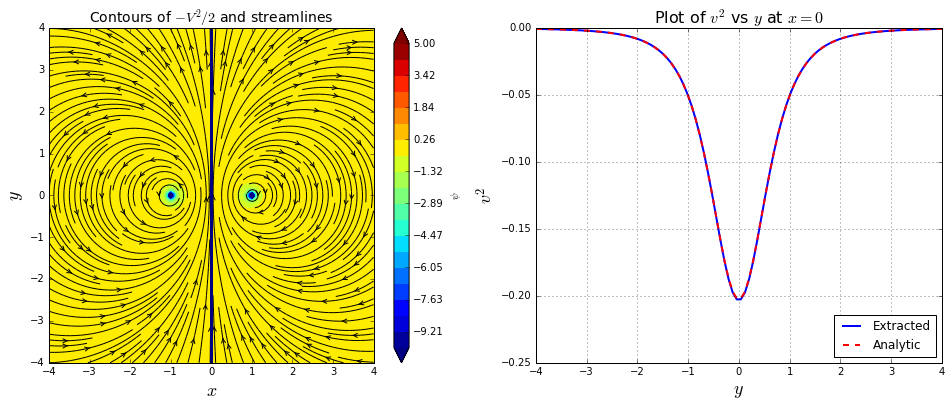

In [22]:
#Plot output

pyplot.figure(figsize=(16,6))

pyplot.subplot(121)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.xlabel('$x$', fontsize=18)
pyplot.ylabel('$y$', fontsize=18)
pyplot.contourf(X,Y,-0.5*velo**2,levels = numpy.linspace(-10, 5, 20), extend='both')
pyplot.colorbar(label='$\psi$')
pyplot.contour(X,Y,psi,levels=[0.], linewidths=3, color ='#000000', linestyles='solid')
pyplot.streamplot(X, Y, xvel, yvel, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.title('Contours of $-V^2/2$ and streamlines', fontsize = 14)

pyplot.subplot(122)
pyplot.plot(y,-0.5*yvel[:,int(N/2)]**2, ls = '-', lw = 2, label='Extracted')
pyplot.plot(y,-0.5*vanalytic**2,color='#FF0000', ls='--', lw = 2, label='Analytic')
pyplot.grid(True)
pyplot.title('Plot of $v^2$ vs $y$ at $x = 0$', fontsize = 16)
pyplot.xlabel('$y$', fontsize=18)
pyplot.ylabel('$v^2$', fontsize=18)
pyplot.legend(loc= 'lower right')

<hr>

### <i>P4: Joukowski transformation to model airfoil</i>

In [23]:
def JoukowskiTransform(zetamat, a):
    zmat = zetamat + a**2/zetamat
    return zmat

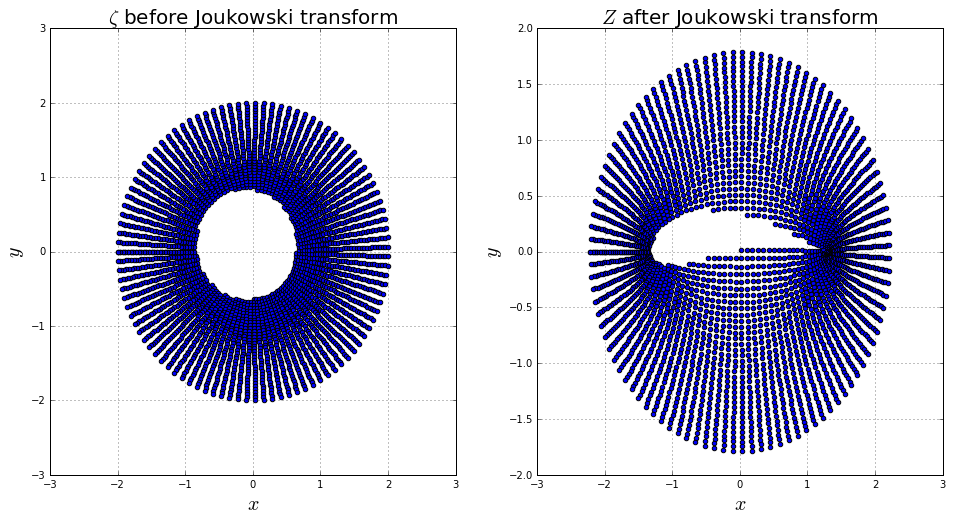

In [39]:
# Define polar grid
ngrad = 50; ngtheta = 100

azimuth = numpy.radians(numpy.linspace(-180,180,ngtheta));
rad = numpy.linspace(0.1,2,ngrad);

r, theta = numpy.meshgrid(rad, azimuth)

Xmin = -2.0; Xmax = 2.0
Ymin = -2.0; Ymax = 2.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

X, Y = numpy.meshgrid(x, y)


#Define complex transform and Joukowski parameter
zeta = r*numpy.exp(1j*theta); a = 0.65

Z = JoukowskiTransform(zeta,a)

pyplot.figure(figsize=(16,8))
pyplot.subplot(121)
pyplot.scatter(zeta.real[abs(zeta-(-0.1+0.1*1j))>0.75], zeta.imag[abs(zeta-(-0.1+0.1*1j))>0.75])
pyplot.xlabel('$x$', fontsize = 20)
pyplot.ylabel('$y$', fontsize = 20)
pyplot.title('$\zeta$ before Joukowski transform', fontsize = 20)
pyplot.grid(True)

pyplot.subplot(122)
pyplot.scatter(Z.real[abs(zeta-(-0.1+0.1*1j))>0.75], Z.imag[abs(zeta-(-0.1+0.1*1j))>0.75])
pyplot.xlabel('$x$', fontsize = 20)
pyplot.ylabel('$y$', fontsize = 20)
pyplot.title('$Z$ after Joukowski transform', fontsize = 20)
pyplot.grid(True)